# Filtres de convolutions & Pooling



Explorons le fonctionnement des filtres de convolution en créant une convolution de base sur une image en noir et blanc.
Tout d'abord, nous pouvons charger une image de scipy.

In [10]:
import cv2
import numpy as np
from scipy import misc
img = misc.face(gray=True)

scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

i = misc.ascent()

Utilisons la bibliothèque pyplot pour afficher l'image.

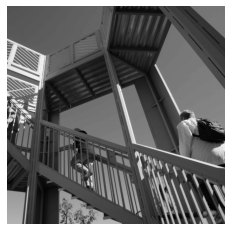

In [11]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

L'image est stockée dans un tableau numpy, nous pouvons donc créer l'image transformée en copiant simplement ce tableau. Récupérons également les dimensions de l'image afin de pouvoir boucler dessus plus tard.

In [12]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

#◢  Filtres de convolution

Nous pouvons maintenant créer un filtre sous la forme d'un tableau 3x3.

In [13]:
# Détection des bords
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight  = 1

Maintenant, nous allons créer une convolution. Nous allons itérer sur l'image, en laissant une marge de 1 pixel, et multiplier chacun des voisins du pixel actuel par la valeur définie dans le filtre.

C'est à dire que le voisin du pixel actuel au-dessus de lui à gauche sera multiplié par l'élément en haut à gauche dans le filtre, etc. etc. Nous allons ensuite multiplier le résultat par le poids, puis nous assurer que le résultat est compris entre 0 et 255.

Enfin, nous chargerons la nouvelle valeur dans l'image transformée.

In [14]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

Nous pouvons afficher l'image résultante de la convolution !

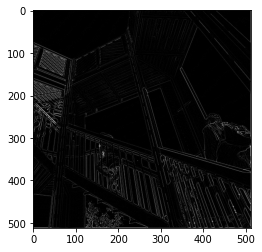

In [15]:
# Plot the image.
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()   


#◢  Pooling

Ce code va effectuer un pooling de (2, 2). L'idée ici est d'itérer sur l'image, et de regarder le pixel et ses voisins immédiats à droite, en dessous, et à droite en dessous. On ne garde que le plus grand d'entre eux pour créer la nouvelle image. Ainsi, la nouvelle image fera 1/4 de la taille de l'ancienne - les dimensions sur X et Y étant divisées par deux par ce processus. Vous verrez que les caractéristiques sont maintenues malgré cette compression !

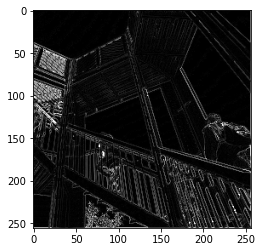

In [16]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image.
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      
    
    